In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

In [3]:
import cv2

In [4]:
DataDir="/content/drive/MyDrive/instgram project/instgram project"
Catigories = ["dog","cat" , "rabbit"]

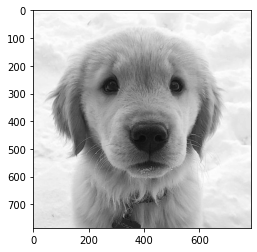

In [5]:
for catigory in Catigories:
  path = os.path.join(DataDir,catigory)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

In [6]:
img_array.shape

(785, 785)

In [7]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [224 225 226 ... 218 218 218]
 [224 225 226 ... 217 217 218]
 [225 226 227 ... 218 218 220]]


Normalize data

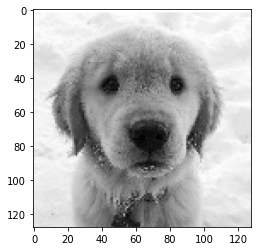

In [8]:
IMG_SIZE = 128

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

image data generatror

In [9]:
training_data = []

def create_training_data():
  for catigory in Catigories:
      path = os.path.join(DataDir,catigory)
      class_num= Catigories.index(catigory)
      for img in os.listdir(path):
        try:
             img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
             new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
             training_data.append([new_array,class_num])
        except Exception as e:
          pass
        

In [10]:
create_training_data()

In [11]:
print(len(training_data))

808


In [12]:
x=[]
y=[]
for features,label in training_data:
  x.append(features)
  y.append(label)

X= np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#-1 to any num of imgs
# 1 because the images are gray scale


In [13]:
import pickle

pickle_out= open("x.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("x.pickle","rb")
X = pickle.load(pickle_in)
y = pickle.load(open("y.pickle","rb"))

In [15]:
X[34]

array([[[ 96],
        [ 95],
        [ 95],
        ...,
        [ 87],
        [ 89],
        [ 91]],

       [[ 59],
        [ 53],
        [ 49],
        ...,
        [ 88],
        [ 89],
        [ 90]],

       [[ 91],
        [ 91],
        [ 90],
        ...,
        [ 89],
        [ 89],
        [ 89]],

       ...,

       [[227],
        [227],
        [227],
        ...,
        [224],
        [224],
        [223]],

       [[225],
        [226],
        [228],
        ...,
        [224],
        [223],
        [223]],

       [[227],
        [227],
        [227],
        ...,
        [224],
        [223],
        [223]]], dtype=uint8)

In [16]:
y[0]

0

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


In [18]:
X

array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [254],
         [255],
         [255]],

        [[245],
         [242],
         [241],
         ...,
         [238],
         [239],
         [241]],

        ...,

        [[224],
         [224],
         [224],
         ...,
         [221],
         [222],
         [225]],

        [[225],
         [227],
         [233],
         ...,
         [217],
         [217],
         [216]],

        [[226],
         [222],
         [223],
         ...,
         [219],
         [218],
         [218]]],


       [[[107],
         [ 76],
         [111],
         ...,
         [191],
         [201],
         [197]],

        [[130],
         [177],
         [141],
         ...,
         [164],
         [176],
         [178]],

        [[132],
         [174],
         [107],
         ...,
         [197],
         [

In [19]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
X = X/255.0

In [30]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape =X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [29]:
X.shape[1:]

(128, 128, 1)

In [32]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

In [33]:
model.fit(X,y,batch_size =100,epochs=15)

Epoch 1/15
9/9 [==============================] - 32s 3s/step - loss: 1.1963 - accuracy: 0.4146
Epoch 2/15
9/9 [==============================] - 30s 3s/step - loss: 1.0154 - accuracy: 0.5347
Epoch 3/15
9/9 [==============================] - 30s 3s/step - loss: 0.9272 - accuracy: 0.5631
Epoch 4/15
9/9 [==============================] - 29s 3s/step - loss: 0.8239 - accuracy: 0.6782
Epoch 5/15
9/9 [==============================] - 30s 3s/step - loss: 0.7027 - accuracy: 0.7277
Epoch 6/15
9/9 [==============================] - 30s 3s/step - loss: 0.5978 - accuracy: 0.7686
Epoch 7/15
9/9 [==============================] - 30s 3s/step - loss: 0.5301 - accuracy: 0.7847
Epoch 8/15
9/9 [==============================] - 31s 3s/step - loss: 0.4620 - accuracy: 0.8032
Epoch 9/15
9/9 [==============================] - 31s 3s/step - loss: 0.3928 - accuracy: 0.8478
Epoch 10/15
9/9 [==============================] - 30s 3s/step - loss: 0.3158 - accuracy: 0.8713
Epoch 11/15
9/9 [======================